In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from statistics import mean
import pandas.io.formats.format as pf

In [2]:
data=pd.read_csv("adult.csv")

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
data.tail()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
48841,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


# Number of rows and number of columns

In [5]:
print(f"Number of rows : {data.shape[0]}")
print(f"Number of columns : {data.shape[1]}")

Number of rows : 48842
Number of columns : 15


# Check info summary

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              48842 non-null  int64 
 1   workclass        48842 non-null  object
 2   fnlwgt           48842 non-null  int64 
 3   education        48842 non-null  object
 4   educational-num  48842 non-null  int64 
 5   marital-status   48842 non-null  object
 6   occupation       48842 non-null  object
 7   relationship     48842 non-null  object
 8   race             48842 non-null  object
 9   gender           48842 non-null  object
 10  capital-gain     48842 non-null  int64 
 11  capital-loss     48842 non-null  int64 
 12  hours-per-week   48842 non-null  int64 
 13  native-country   48842 non-null  object
 14  income           48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


DataFrame has 15 columns                                                          
6 columns are (int64 Dtype) and 9 columns are (object Dtype)                                              
Some columns have value as '?'                                                                                        
Let's find out how many columns have '?'                                                                    

In [7]:
data.isin(['?']).sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

'workclass' column has 2799 '?'                                                               
'occupation' column has 2809 '?'                                                                
'native-country' column has 857 '?'                                                    
We will convert '?' into NaN                                         

In [8]:
data['workclass'] = data['workclass'].replace('?', np.nan)
data['occupation'] = data['occupation'].replace('?', np.nan)
data['native-country'] = data['native-country'].replace('?', np.nan)

In [9]:
data.isin(['?']).sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Successfully converted "?" into NaN.

# Check null values

In [10]:
data.isnull().sum()

age                   0
workclass          2799
fnlwgt                0
education             0
educational-num       0
marital-status        0
occupation         2809
relationship          0
race                  0
gender                0
capital-gain          0
capital-loss          0
hours-per-week        0
native-country      857
income                0
dtype: int64

In [13]:
percent_missing = data.isnull().sum() * 100 / len(data)
percent_missing

age                0.000000
workclass          5.730724
fnlwgt             0.000000
education          0.000000
educational-num    0.000000
marital-status     0.000000
occupation         5.751198
relationship       0.000000
race               0.000000
gender             0.000000
capital-gain       0.000000
capital-loss       0.000000
hours-per-week     0.000000
native-country     1.754637
income             0.000000
dtype: float64

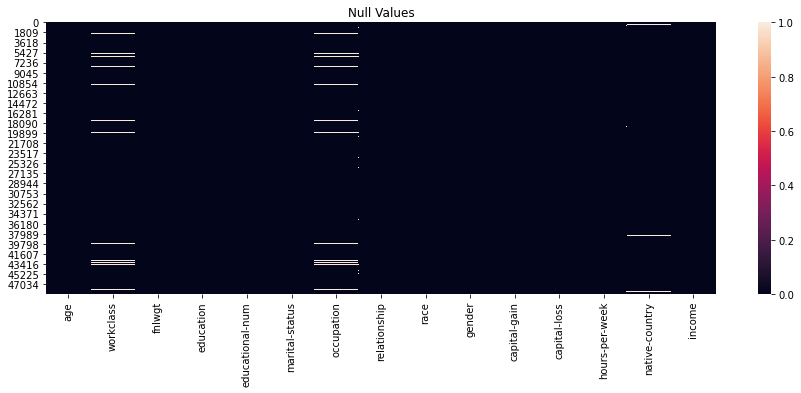

In [16]:
plt.figure(figsize=(15,5))
sns.heatmap(data.isna())
plt.title('Null Values')
plt.show()

Now we have,                                    
2799 - 5.73 % null values in 'workclass' column                              
2809 - 5.75 %null values in 'occupation' column                                    
457 - 1.75 % null values in 'native-country' column                                          
We can drop all those null values                                           

Drop all The Missing Values

In [17]:
data.dropna(how='any', inplace=True)

In [18]:
data.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

Successfully dropped all the null values.

# Check for duplicate values

In [19]:
print(f"We have {data.duplicated().sum()} duplicate values")

We have 47 duplicate values


In [20]:
# Drop duplicate values¶

In [21]:
data = data.drop_duplicates()

print(f"After dropping duplicate values, now we have {data.duplicated().sum()} duplicate values")

After dropping duplicate values, now we have 0 duplicate values


# Check descriptive statistics - Numerical columns

In [22]:
data.describe()

,age,fnlwgt,educational-num,capital-gain,capital-loss,hours-per-week
count,45175.000000,4.517500e+04,45175.000000,45175.000000,45175.000000,45175.000000
mean,38.556170,1.897388e+05,10.119314,1102.576270,88.687593,40.942512
std,13.215349,1.056524e+05,2.551740,7510.249876,405.156611,12.007730
min,17.000000,1.349200e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.173925e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783120e+05,10.000000,0.000000,0.000000,40.000000
75%,47.000000,2.379030e+05,13.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


# Check descriptive statistics - Categorical columns

In [23]:
data.describe(exclude='number')

,workclass,education,marital-status,occupation,relationship,race,gender,native-country,income
count,45175,45175,45175,45175,45175,45175,45175,45175,45175
unique,7,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Craft-repair,Husband,White,Male,United-States,<=50K
freq,33262,14770,21042,6010,18653,38859,30495,41256,33973


Check 'education' & 'educational-num' columns

In [24]:
data['education'].unique()

array(['11th', 'HS-grad', 'Assoc-acdm', 'Some-college', '10th',
       'Prof-school', '7th-8th', 'Bachelors', 'Masters', '5th-6th',
       'Assoc-voc', '9th', 'Doctorate', '12th', '1st-4th', 'Preschool'],
      dtype=object)

In [25]:
data['educational-num'].unique()

array([ 7,  9, 12, 10,  6, 15,  4, 13, 14,  3, 11,  5, 16,  8,  2,  1],
      dtype=int64)

As we can see, 'education' & 'educational-num' both columns have similer values               
'education' has string values               
'educational-num' has numerical values                         
all HS-grad from education represents 9 in education-num                          
all Masters from education represents 14 in education-num and likewise.                          
Both columns conveying same information                                        
So, we can remove 'education-num' column                                                               

Drop education-num column

In [26]:
data.drop(['educational-num'], axis=1)

,age,workclass,fnlwgt,education,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
48838,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
48839,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
48840,22,Private,201490,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


We have successfully dropped [ 'education-num' ] column.

Drop capital-gain, and capital-loss columns

As we can see in 'descriptive statistics - Numerical columns',                        
[ 'capital-gain' ] & [ 'capital-loss' ] both columns have 75% data as 0.00                                
So, we can drop [ 'capital-gain' ] & [ 'capital-loss' ] both columns                                        

In [28]:
data.drop(['capital-gain', 'capital-loss'], axis=1)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,30,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,38,United-States,<=50K
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,40,United-States,>50K
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,40,United-States,<=50K
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,20,United-States,<=50K


We have successfully dropped [ 'capital-gain' ] & [ 'capital-loss' ] both columns.

# Univariate Analysis

The Distribution of Age Column

In [29]:
data['age'].describe()

count    45175.000000
mean        38.556170
std         13.215349
min         17.000000
25%         28.000000
50%         37.000000
75%         47.000000
max         90.000000
Name: age, dtype: float64

<AxesSubplot:>

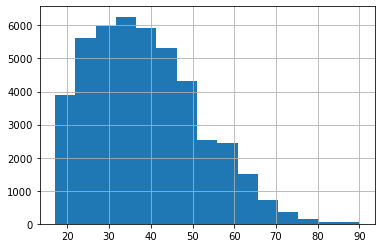

In [30]:
data['age'].hist(bins=15)

As per above histogram .describe method,                               
[ 'age' ] column has 25 % below age 28                                      
[ 'age' ] column has 50 % below age 37                                  
[ 'age' ] column has 75 % below age 47                                  
Most of the age values are between 17 to 50                                                        

Total number of people having age between 17 To 50 (Inclusive)

In [31]:
print(f"Total number of people having age between 17 To 50 : {len(data[data['age'].between(17,50)])}")

Total number of people having age between 17 To 50 : 36495


The distribution of workclass column

In [32]:
data['workclass'].describe()

count       45175
unique          7
top       Private
freq        33262
Name: workclass, dtype: object

<AxesSubplot:>

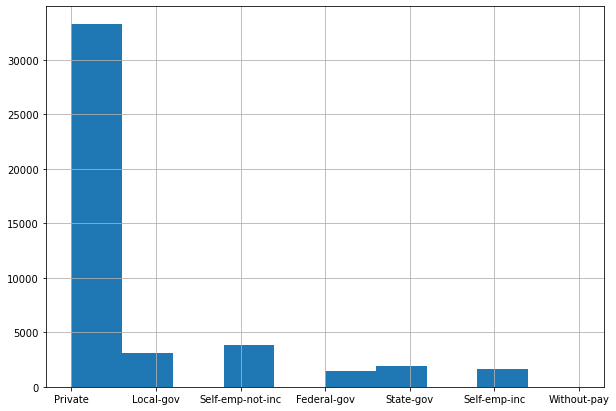

In [33]:
plt.figure(figsize=(10,7))
data['workclass'].hist()

Most of the employees are from 'Private' sector

People have bachelors and masters degree

In [34]:
print(f"{len(data[data['education'].isin(['Bachelors', 'Masters'])])} : people have bachelors and masters degree")

10072 : people have bachelors and masters degree


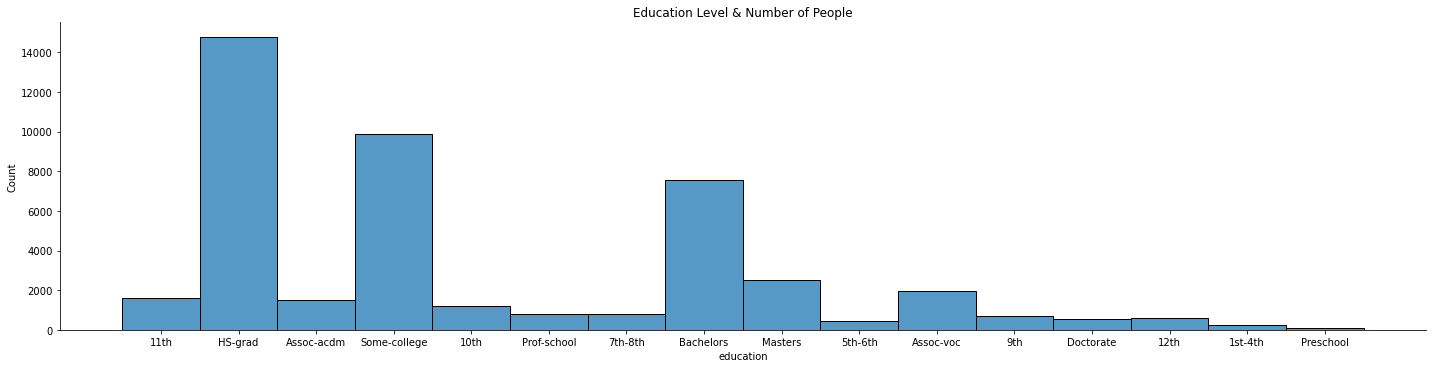

In [35]:
sns.displot(x=data['education'], aspect=4)
plt.title('Education Level & Number of People')
plt.show()

# Bivariate Analysis

Relationship between Income and Age

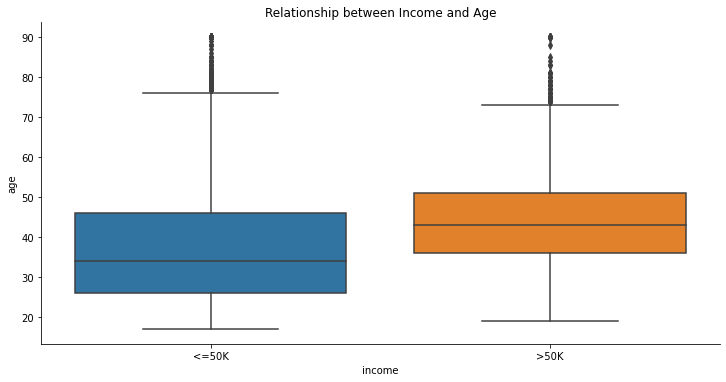

In [36]:
sns.catplot(data=data, x='income', y='age', kind= 'box', aspect=2)
plt.title('Relationship between Income and Age')
plt.show()

Most of the people having income less than or equal to 50K are between age 25-45                               
Most of the people having income more than 50K are between age 37-50                                               

Replace salary values [<=50K, >50K] with 0 and 1

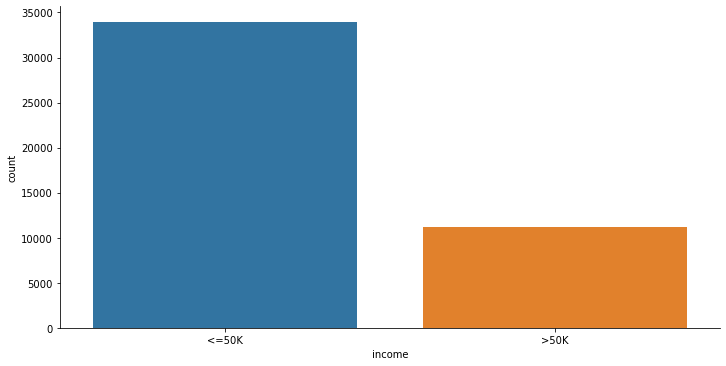

In [37]:
sns.catplot(data=data, x='income', kind= 'count', aspect=2)

Method 1                                                         
Creating a function to convert salary values [<=50K, >50K] with 0 and 1

In [39]:
def income_data(income):
    if income == '<=50K':
        return 0
    else:
        return 1

Creating a separate column --> ['encoded_income']

In [40]:
data['encoded_income'] = data['income'].apply(income_data)
data.head(1)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,encoded_income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0


We have successfully added new column ['encoded_income'] with values 0 and 1

Method 2
Using replece method

In [42]:
data.replace(to_replace=['<=50K', '>50K'], value=[0, 1], inplace=True)

In [43]:
data.head(1)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,encoded_income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0,0


We have successfully replaced incom values [<=50K, >50K] with 0 and 1 in the same column                
Now we can drop 'encoded_income' column                                 

In [44]:
data.drop(columns='encoded_income', axis=1)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48837,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
48838,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
48839,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
48840,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


Workclass which getting the highest income

In [45]:
data.groupby('workclass')['income'].mean().sort_values(ascending= False)

workclass
Self-emp-inc        0.554407
Federal-gov         0.390469
Local-gov           0.295161
Self-emp-not-inc    0.279051
State-gov           0.267215
Private             0.217816
Without-pay         0.095238
Name: income, dtype: float64

Self-emp-inc workclass is getiing the highest income.

How has better chance to get income greater than 50K, Male or Female?

In [46]:
data.groupby('gender')['income'].mean().sort_values(ascending=False)

gender
Male      0.312609
Female    0.113692
Name: income, dtype: float64

As per above result, 'Male' has better chance to get income greater than 50K.

Covert workclass Columns Datatype To Category Datatype

In [47]:
data['workclass'] = data['workclass'].astype('category')

In [48]:
data.dtypes

age                   int64
workclass          category
fnlwgt                int64
education            object
educational-num       int64
marital-status       object
occupation           object
relationship         object
race                 object
gender               object
capital-gain          int64
capital-loss          int64
hours-per-week        int64
native-country       object
income                int64
encoded_income        int64
dtype: object

We have successfully change the dtype of ['workclass'] column